<a href="https://colab.research.google.com/github/Pricylia/Topicos-Especiais/blob/main/Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-ods-reader
import pandas_ods_reader as pdos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df = pdos.read_ods('dados.ods')
df

,unnamed.1,Fluxo Escolar - Label,Campus (Nome),Curso+Modalidade,Matrícula retida?,Ingressantes em (Período Letivo),Modalidade de Ensino,Modalidade do Curso,Nível de Ensino,Período Letivo,...,É ingressante? (rótulo),É matrícula retida neste período letivo?,Última Alteração de Situação,CH,CH. Disc. Obrigatórias,CH. Disc. Optativas,Duracao curso,Idade (Hoje),Periodos Cursados,Período Letivo da Mudança de Situação
0,0.0,Em Curso,Acaraú,LÍNGUA INGLESA,Dentro do prazo,20192.0,Presencial,Fic,Básico,2019/2,...,Ingressante,Não Retida,2019-11-07,160.0,160.0,0.0,2.0,35.0,1.0,2019/2
1,2.0,Evadidos,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Dentro do prazo,20151.0,Presencial,Subsequente,Técnico,2015/2,...,Veterano,Não Retida,2016-02-26,1240.0,1240.0,0.0,4.0,28.0,2.0,2015/2
2,3.0,Formados,Acaraú,XADREZ BÁSICO,Dentro do prazo,20172.0,Presencial,Fic,Básico,2017/2,...,Ingressante,Não Retida,2018-05-16,60.0,60.0,0.0,1.0,22.0,1.0,2017/2
3,5.0,Formados,Acaraú,TÉCNICO EM EVENTOS (Subsequente),Fora do prazo,20172.0,Presencial,Subsequente,Técnico,2017/2,...,Ingressante,Não Retida,2018-11-09,800.0,800.0,0.0,2.0,23.0,2.0,None
4,7.0,Evadidos,Acaraú,LICENCIATURA EM CIÊNCIAS BIOLÓGICAS,Dentro do prazo,20152.0,Presencial,Licenciatura,Graduação,2016/1,...,Veterano,Não Retida,2016-12-01,2940.0,2860.0,80.0,8.0,23.0,2.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,8434.0,Formados,Acaraú,MATEMÁTICA BÁSICA,Dentro do prazo,20182.0,Presencial,Fic,Básico,2018/2,...,Ingressante,Não Retida,2019-05-09,40.0,40.0,0.0,1.0,21.0,1.0,2018/2
3316,8435.0,Em Curso,Acaraú,LÍNGUA INGLESA,Dentro do prazo,20192.0,Presencial,Fic,Básico,2019/2,...,Ingressante,Não Retida,2019-10-16,160.0,160.0,0.0,2.0,26.0,1.0,None
3317,8437.0,Evadidos,Acaraú,LÍNGUA INGLESA,Fora do prazo,20172.0,Presencial,Fic,Básico,2018/1,...,Veterano,Retida,2018-06-19,160.0,160.0,0.0,2.0,28.0,2.0,2018/1
3318,8443.0,Formados,Acaraú,TÉCNICO EM AQUICULTURA (Subsequente),Fora do prazo,20161.0,Presencial,Subsequente,Técnico,2018/2,...,Veterano,Retida,2018-12-28,1240.0,1240.0,0.0,4.0,22.0,6.0,2018/2


# *Pré-processamento dos dados e renomeação de colunas*

In [ ]:
# Substituindo 'Nome_da_Coluna' pelos nomes reais das colunas relevantes
relevant_columns = [
    'Fluxo Escolar - Label', 'Campus (Nome)', 'Curso+Modalidade',
    'Matrícula retida?', 'Ingressantes em (Período Letivo)',
    'Modalidade de Ensino', 'Nível de Ensino', 'CH',
    'Duracao curso', 'Idade (Hoje)', 'Periodos Cursados'
]

data_relevant = df[relevant_columns]

In [ ]:
# Renomeando colunas
data_relevant.columns = [
    'Fluxo', 'Campus', 'Curso', 'Matricula_Retida',
    'Ingresso_Periodo', 'Modalidade_Ensino', 'Nivel_Ensino',
    'CH_Total', 'Duracao_Curso', 'Idade', 'Periodos_Cursados'
]

# *Codificando as variáveis categóricas*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Codificar as variáveis categóricas
categorical_columns = ['Fluxo', 'Campus', 'Curso', 'Matricula_Retida', 'Modalidade_Ensino', 'Nivel_Ensino']
for col in categorical_columns:
    data_relevant[col] = label_encoder.fit_transform(data_relevant[col])

<ipython-input-25-cbff9cfb934f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant[col] = label_encoder.fit_transform(data_relevant[col])
<ipython-input-25-cbff9cfb934f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant[col] = label_encoder.fit_transform(data_relevant[col])
<ipython-input-25-cbff9cfb934f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

# *Normalizando as variáveis numéricas*

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar variáveis independentes (features) e variável alvo (target)
X = data_relevant.drop(columns=['Fluxo'])
y = data_relevant['Fluxo']

# Normalizar as variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# *Dividindo os dados e treinando o modelo LinearSVC*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinar o modelo LinearSVC
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia (percentual de evasão correta)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Percentual de acurácia: {accuracy_percentage:.2f}%")

Percentual de acurácia: 72.29%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# *Gerando a matriz de confusão para o LinearSVC*

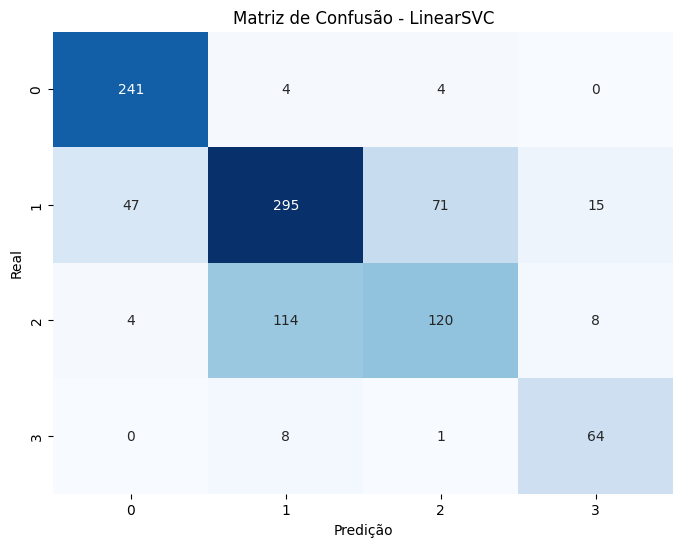

In [ ]:
# Calcular a matriz de confusão para o modelo LinearSVC
conf_matrix_svc = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - LinearSVC')
plt.show()

# *Testando com o modelo KNeighborsClassifier*

In [ ]:
# Inicializar o modelo KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Você pode ajustar o número de vizinhos (k)

# Treinar o modelo com os dados de treino
knn_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Calcular a acurácia
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_percentage_knn = accuracy_knn * 100

print(f"Percentual de acurácia usando KNeighborsClassifier: {accuracy_percentage_knn:.2f}%")


Percentual de acurácia usando KNeighborsClassifier: 78.61%


# *Mapeamento para melhor visualização da matriz de confusão para modelo KNeighborsClassifier*

In [ ]:
class_labels = {
    0: 'Matriculados e cursando normalmente',
    1: 'Evadiram',
    2: 'Retidos em um ou mais períodos',
    3: 'Concluíram o curso'
}

# *Gerando matriz de confusão para modelo KNeighborsClassifier*



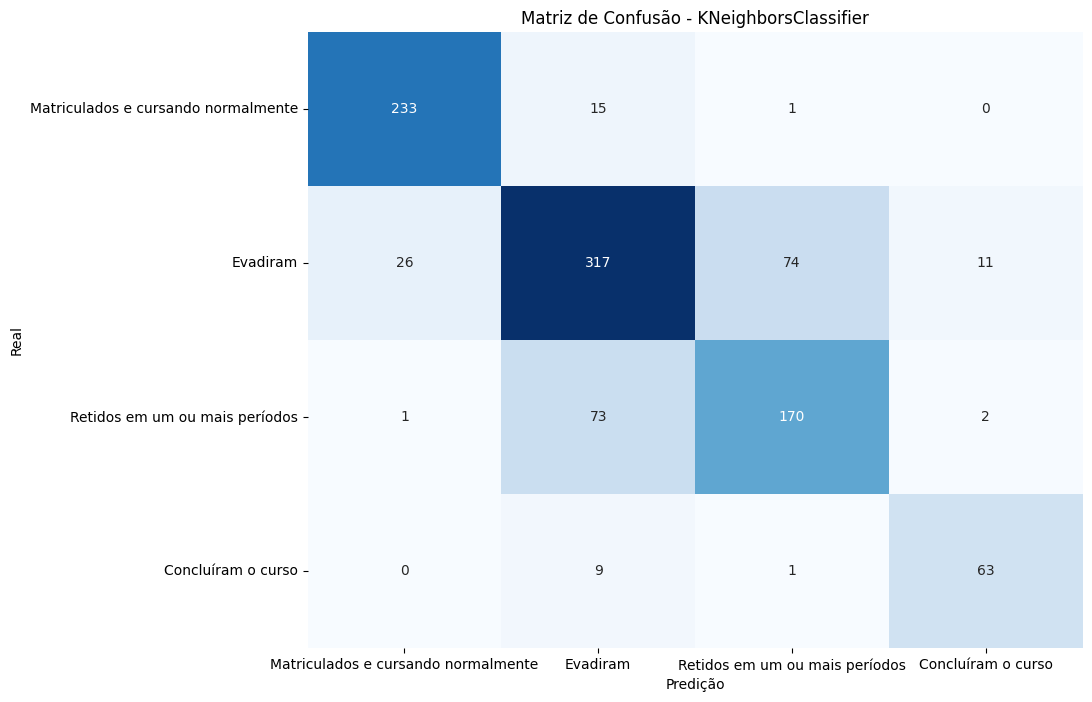

In [ ]:
# Gerar a matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Mapeando os números para as descrições
labels = [class_labels[i] for i in sorted(class_labels.keys())]

# Plotar a matriz de confusão com os rótulos descritivos
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNeighborsClassifier')
plt.show()